In [1]:
import json
from pathlib import Path
from docile.dataset import Dataset
from docile.dataset import Field
from docile.tools.my_dataset_browser import MyDatasetBrowser, load_predictions
from docile.evaluation import EvaluationResult

In [2]:
DATASET_PATH = Path("/storage/pif_documents/dataset_exports/docile221221-0/")
dataset = Dataset("test", DATASET_PATH)

Loading documents for docile221221-0:test: 100%|██████████| 1000/1000 [00:04<00:00, 221.36it/s]


In [3]:
from docile.evaluation.evaluate import evaluate_dataset

#intermediate_predictions = load_predictions(Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/LayoutLMv3_wr025/v2/test_intermediate_predictions.json"))
kile_predictions = load_predictions(Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/LayoutLMv3_wr025/v2/test_predictions_KILE.json"))
lir_predictions = load_predictions(Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/LayoutLMv3_wr025/v2/test_predictions_LIR.json"))

intermediate_predictions = load_predictions(Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/RoBERTa_base_gas4_wr01_stride_128_new2DposEmb/test_intermediate_predictions.json"))
kile_predictions = load_predictions(Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/RoBERTa_base_gas4_wr01_stride_128_new2DposEmb/test_predictions_KILE.json"))
lir_predictions = load_predictions(Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/RoBERTa_base_gas4_wr01_stride_128_new2DposEmb/test_predictions_LIR.json"))

In [4]:
#EVALUATION_PATHS = [
#    Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/LayoutLMv3_wr025/v2/test_results_KILE.json"), 
#    Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/LayoutLMv3_wr025/v2/test_results_LIR.json")
#]

EVALUATION_PATHS = [
    Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/RoBERTa_base_gas4_wr01_stride_128_new2DposEmb/test_results_KILE.json"), 
    Path("/storage/table_extraction/predictions/NER/fullpage_multilabel/docile221221-0/RoBERTa_base_gas4_wr01_stride_128_new2DposEmb/test_results_LIR.json")
]

evaluation_results = EvaluationResult.from_files(*EVALUATION_PATHS)

In [ ]:
#kile_predictions

In [5]:
callbacks = ["Annotations_KILE", "Annotations_LIR", "Predictions_KILE", "Predictions_LIR", "Predictions_intermediate"]
browser = MyDatasetBrowser(dataset, evaluation_results=evaluation_results, kile_predictions=kile_predictions, lir_predictions=lir_predictions, intermediate_predictions=intermediate_predictions, callbacks=callbacks)

In [7]:
kile_f1 = [browser.evaluation_results.get_metrics("kile", docid=x.docid)["f1"] for x in browser.dataset]

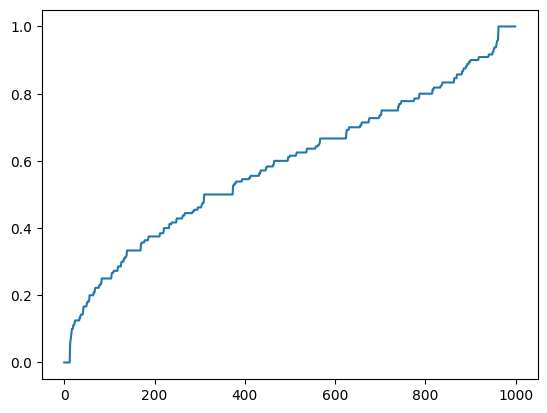

In [24]:
import matplotlib.pyplot as plt 
task = "kile"
#task = "lir"
#metric = "f1"
#metric = "AP"
#metric = "precision"
metric = "recall"
values = [browser.evaluation_results.get_metrics(task, docid=x.docid)[metric] for x in browser.dataset]
values.sort()
plt.plot(values)

In [ ]:
browser.evaluation_results.get_metrics("kile", docid=browser.document.docid)

In [ ]:
#browser.document_tabs.children[browser.page].value
#browser.svg_content

In [ ]:
#dataset.documents[0].page_image(0)
#dataset.documents[0].page_image(0).size[1]
dataset.documents[0].annotation.fields[0].bbox.to_tuple()[0]

In [ ]:
from docile.evaluation.evaluate import compute_metrics
compute_metrics(browser.evaluation_result_KILE.task_to_docid_to_matching["kile"][browser.document.docid])

In [ ]:
print(browser.evaluation_result_KILE.print_report(browser.document.docid))

In [ ]:
browser.evaluation_result_KILE.get_metrics("kile", docid=browser.document.docid)

In [ ]:
browser.evaluation_result_LIR.get_metrics("lir", docid=browser.document.docid)